In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as optim
import warnings
warnings.filterwarnings('ignore')

In [4]:

# test = pd.read_csv('./cells1.csv')
test = pd.read_excel('./P462_summary (003)_final.xlsx',sheet_name='eoc_eod_ce')

In [11]:
# test1 =  test[['cycle','cell','abs_cap_cover20']]
test1 = pd.DataFrame()
test1['cycles'] = test['cycle']
test1['capacity'] = test['abs_cap_cover20']
test1['cell'] = test['cell']

In [12]:
test1

,cycles,capacity,cell
0,0,0.036485,4
1,0,0.036564,5
2,0,0.036599,6
3,0,0.036681,7
4,0,0.037020,8
...,...,...,...
229,450,0.033281,17
230,450,0.034032,18
231,450,0.030841,19
232,450,0.034403,20


In [13]:
def sre(abm,cycles):
    a = abs(abm[0])
    b = abm[1]
    m = abm[2]
    return (2*m)*((0.5)-(1/(1+np.exp((a*cycles)**b))))

In [14]:
def sre_fit(parm,capacity,cycles):
    try:
        pred_val = sre(parm,cycles)
    except:
        pred_val = [sre(parm,i) for i in cycles]
    result = np.sqrt(np.mean((capacity-pred_val)**2))
    return result

In [30]:
def sre_optimize(dataset,cellnumber,a,b):
    capacity = dataset['capacity'][dataset['cell']==cellnumber]
    capacity = capacity.reset_index(drop=True)
    cycles = dataset['cycles'][dataset['cell']==cellnumber]
    cycles = cycles.reset_index(drop=True)
    
    parm = np.c_[a,b,max(capacity)][0]
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,3,1)
    plt.plot(cycles,capacity)
    plt.title("Before Model")
    
    plt.subplot(1,3,2)
    plt.plot(sre(parm,cycles))
    plt.title("Sre with parameters")
    
    plt.subplot(1,3,3)
    fit = optim.minimize(fun=sre_fit,x0=parm,args=(capacity,cycles),method='L-BFGS-B')
    plt.scatter(x=range(len(capacity)),y = capacity)
    plt.plot(sre(fit.x,cycles),'r')
    plt.title("After model")
    plt.show()
    return fit.x

In [40]:
# a = np.linspace(0,0.2,2)
# b = np.linspace(0.3,0.7,2)
a = [0.2]
b = [0.3]

Cell Number =  4


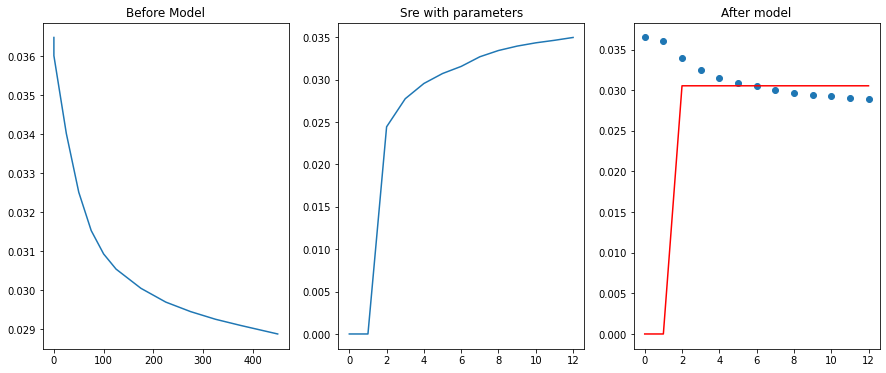

a =  1.049300953865567 
b =  0.7859866515381525 
m =  0.030538377139152206
Cell Number =  5


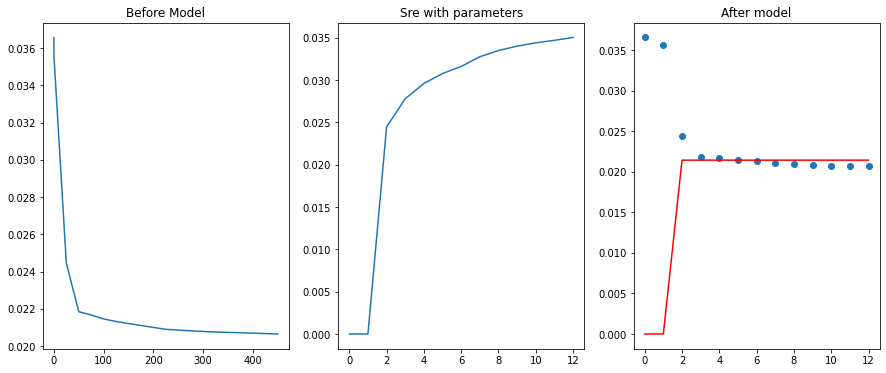

a =  1.1181638377668608 
b =  0.774803595211819 
m =  0.021435526495697334
Cell Number =  6


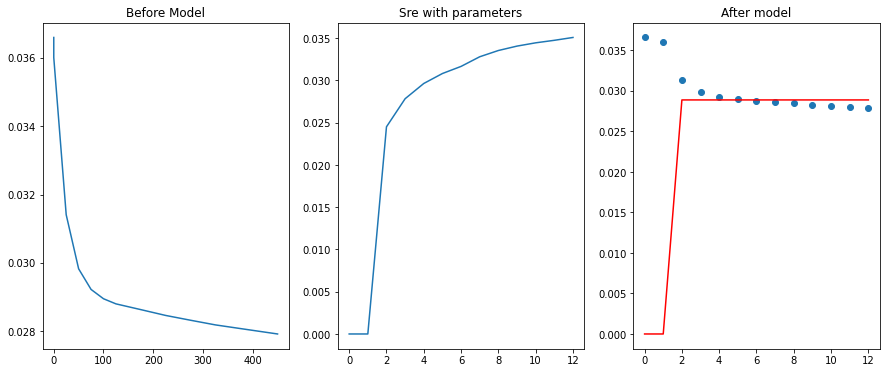

a =  1.014576842922344 
b =  0.7531435660680798 
m =  0.02888857254205049
Cell Number =  7


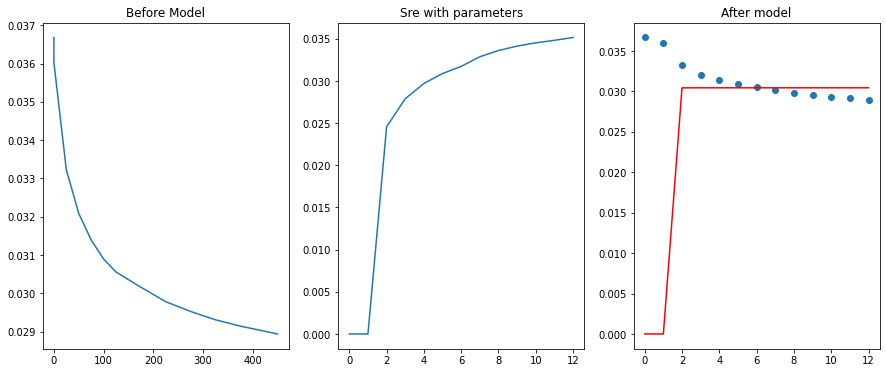

a =  0.9052947433981701 
b =  0.70870462087282 
m =  0.030453978731776382
Cell Number =  8


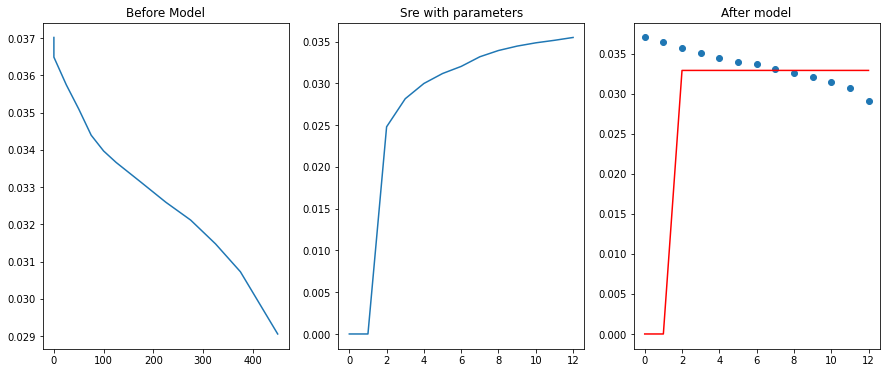

a =  0.8959352542983183 
b =  0.7616205949005724 
m =  0.03290628640891075
Cell Number =  9


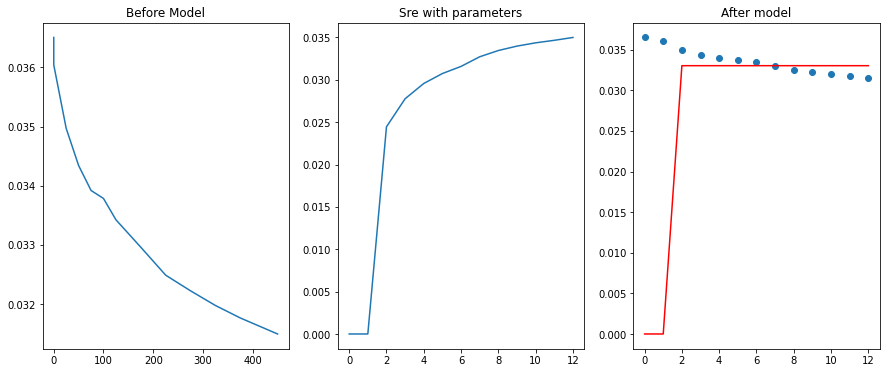

a =  0.9450537329905355 
b =  0.7598565165804434 
m =  0.03303179202329286
Cell Number =  10


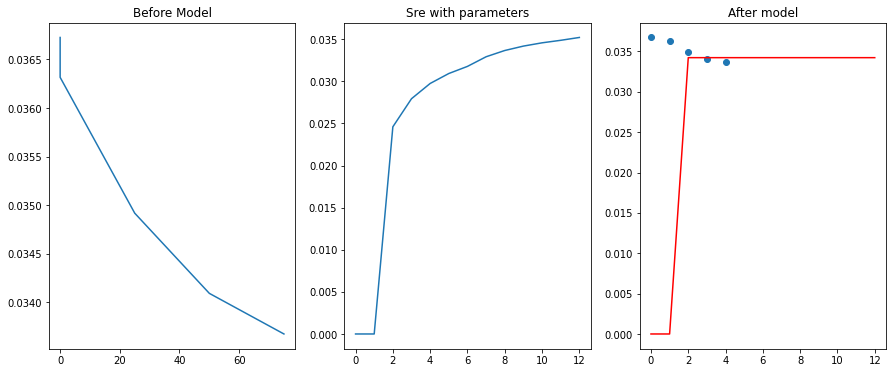

a =  0.5664941553913689 
b =  1.8893782666316966e-06 
m =  0.07405843609646602
Cell Number =  11


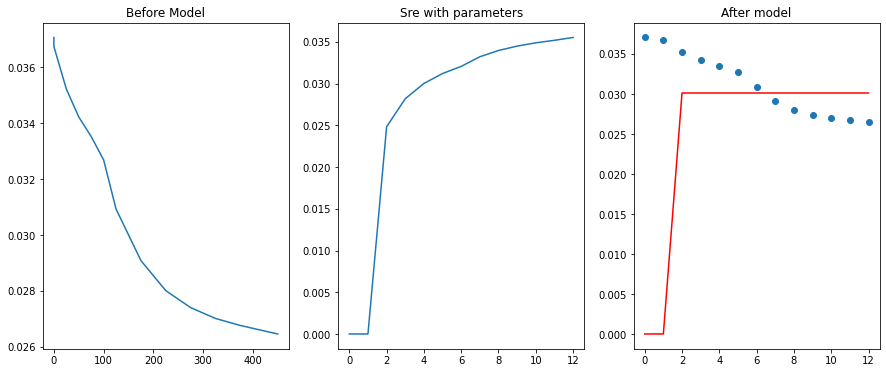

a =  1.1342070502082546 
b =  0.7197283199578481 
m =  0.03011759222317473
Cell Number =  12


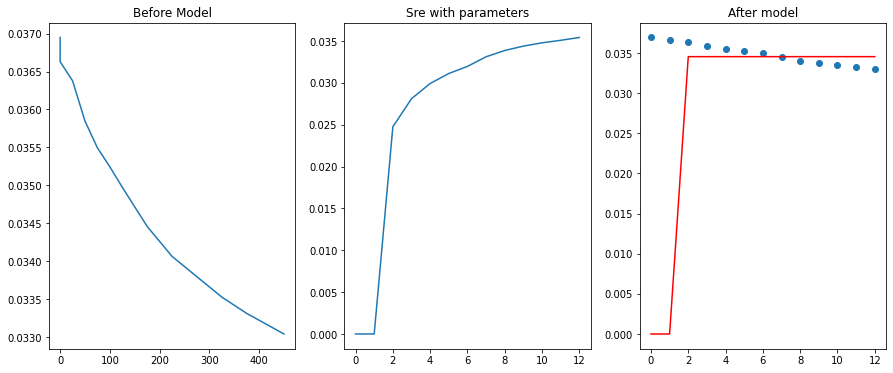

a =  0.9203410787349886 
b =  0.7451870133666644 
m =  0.034558260181252506
Cell Number =  2


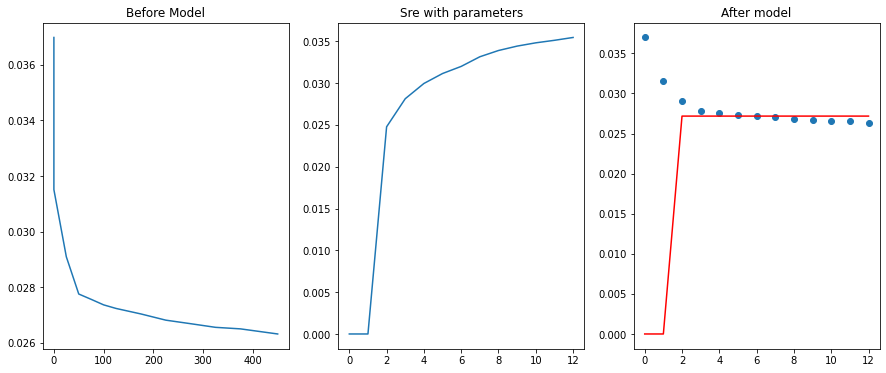

a =  1.0528198703214207 
b =  0.7417530177848788 
m =  0.02717821127780275
Cell Number =  13


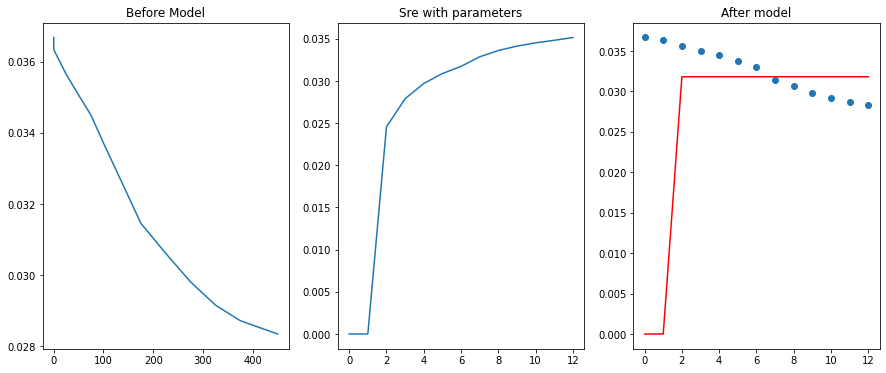

a =  1.0238791460321033 
b =  0.8064888197493822 
m =  0.03181827295980601
Cell Number =  15


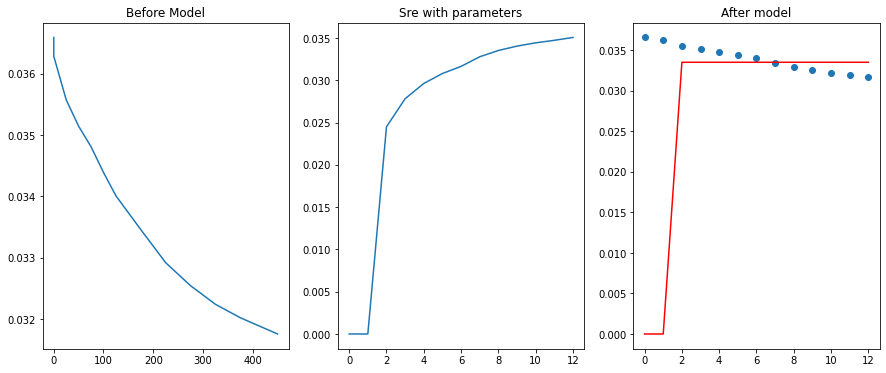

a =  0.9443921099706084 
b =  0.7682153511072244 
m =  0.033533507006920676
Cell Number =  16


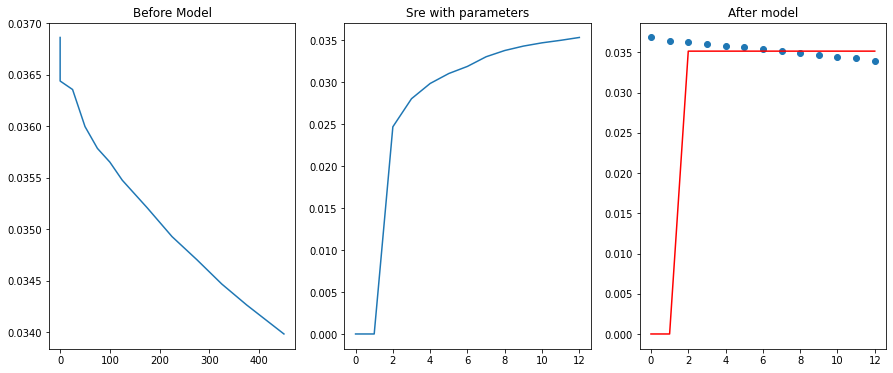

a =  0.9345102259968118 
b =  0.7511550166277887 
m =  0.0351608421837347
Cell Number =  17


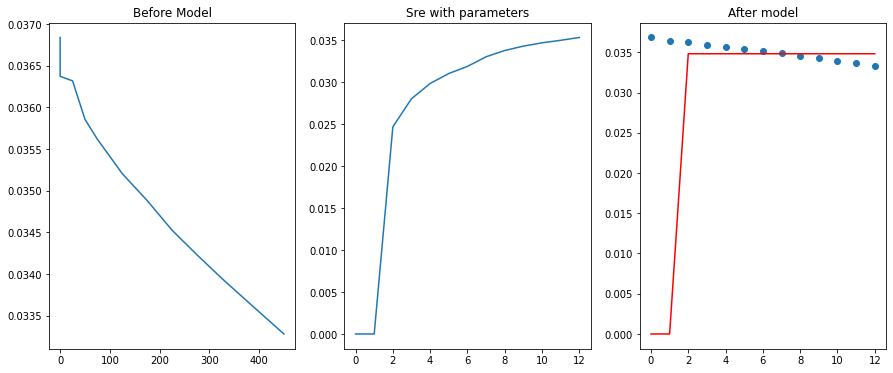

a =  1.0034947989453085 
b =  0.8009772677737411 
m =  0.03481455127214502
Cell Number =  18


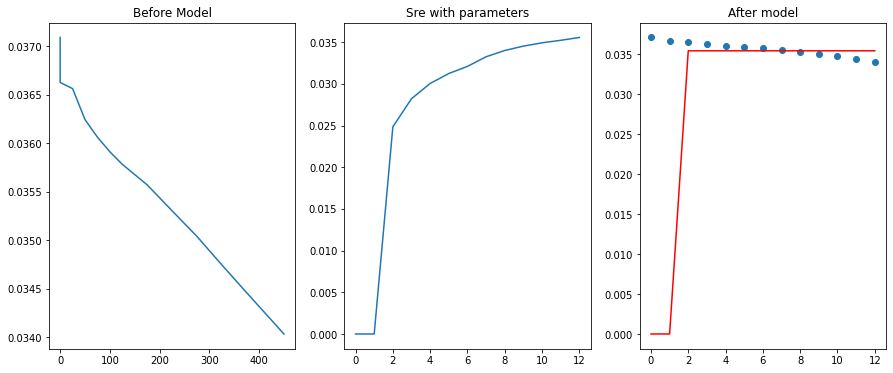

a =  0.9174413287433235 
b =  0.7464676699136477 
m =  0.035423742185394125
Cell Number =  19


In [ ]:
final_df = pd.DataFrame(columns=['cell','a','b','m'])
for i in test.cell.unique():
    for aval in a:
        for bval in b:
            print("Cell Number = ",i)
            print("="*30)
            output_params = sre_optimize(dataset=test1,cellnumber=i,a=aval,b=bval)
            sample_df = pd.DataFrame({'cell':i,'a':abs(output_params[0]),'b':abs(output_params[1]),'m':abs(output_params[2])},index=[1])
            final_df = pd.concat([final_df,sample_df])
            print("a = ",abs(output_params[0]),"\nb = ",abs(output_params[1]),"\nm = ",abs(output_params[2]))
            print("="*30)
final_df.reset_index(drop=True,inplace=True)

In [37]:
final_df

,cell,a,b,m
0,4,0.163908,-3.036654e-05,0.051865
1,4,0.270090,1.344894e+00,0.030538
2,4,1.049301,7.859867e-01,0.030538
3,4,0.552765,8.694485e-01,0.030539
4,5,0.136250,-3.476636e-09,0.040958
...,...,...,...,...
67,20,0.638577,9.118977e-01,0.035504
68,21,0.154686,-6.619411e-05,0.054045
69,21,0.255222,1.314977e+00,0.033282
70,21,0.922169,7.752327e-01,0.033282


In [84]:
capacity = test['capacity'][test['cell']==4]
capacity = capacity.reset_index(drop=True)
cycles = test['cycles'][test['cell']==4]
cycles = cycles.reset_index(drop=True)

In [122]:
# plt.plot(cycles1,capacity1)
# plt.show()

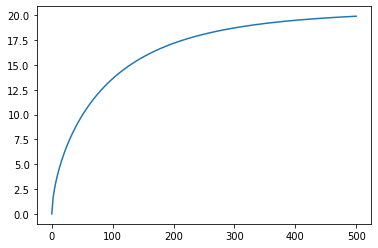

In [123]:
plt.plot(cycles,capacity)
plt.show()

In [126]:
parm = np.c_[0.2,0.3,max(capacity)][0]

In [127]:
sre(parm,cycles)

0       0.000000
1       7.387906
2       8.940585
3       9.927077
4      10.657506
         ...    
213    19.141143
214    19.145201
215    19.149225
216    19.153214
217    19.157170
Name: cycles, Length: 218, dtype: float64

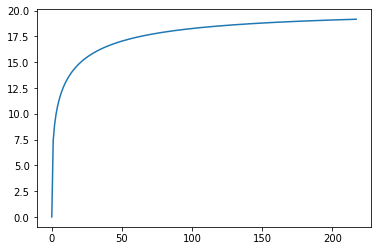

In [128]:
plt.plot(sre(parm,cycles))
plt.show()

In [130]:
fit = optim.minimize(fun=sre_fit,x0=parm,args=(capacity,cycles),method='L-BFGS-B')

In [131]:
fit

      fun: 1.4964324584318091e-06
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.19842975, -0.56492814, -0.08663836])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 352
      nit: 45
     njev: 88
   status: 0
  success: True
        x: array([ 0.02191707,  0.60000005, 20.48784475])

In [133]:
# plt.scatter(x=range(len(capacity1)),y = capacity1)
# plt.plot([sre(fit.x,i) for i in cycles1],'r')

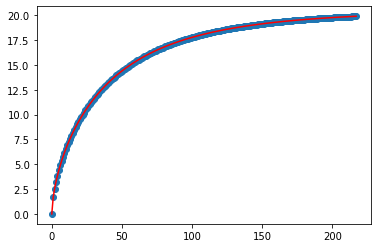

In [134]:
plt.scatter(x=range(len(capacity)),y = capacity)
plt.plot(sre(fit.x,cycles),'r')

# Testing

In [184]:
test1 = pd.read_excel('./CellSage-based analyses (selected XCEL cells) (003) (version 1).xlsx')
test1 = test1.iloc[:14,19:21]
test1.columns = test1.loc[1]
test1 = test1.loc[2:]
test1.reset_index(drop=True,inplace=True)

capacity1 = test1['Capacity loss, %']
cycles1 = test1['Cycles']

In [185]:
test1

1,Cycles,"Capacity loss, %"
0,0,0
1,25,31.3169
2,50,38.6417
3,75,39.1415
4,100,39.7364
5,125,40.1222
6,175,40.7271
7,225,41.2971
8,275,41.5282
9,325,41.7094


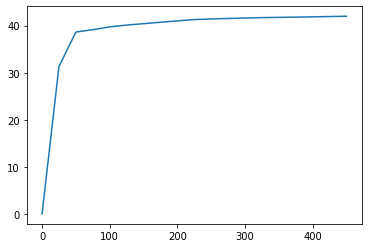

In [186]:
plt.plot(cycles1,capacity1)
plt.show()

In [187]:
parm = np.c_[0.15,0.175,max(capacity)][0]

In [188]:
sre_c1 = []
for i in cycles1:
    sre_c1.append(sre(parm,i))

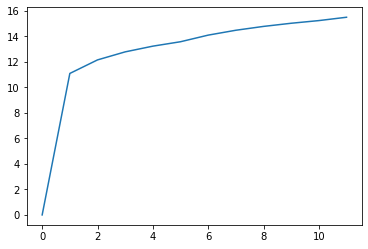

In [189]:
plt.plot(sre_c1)
plt.show()

In [190]:
fit = optim.minimize(fun=sre_fit,x0=parm,args=(capacity1,cycles1),method='L-BFGS-B')

In [191]:
fit

      fun: 2.775722193057233
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 52
      nit: 5
     njev: 13
   status: 0
  success: True
        x: array([ 0.74143484,  1.75510593, 39.82097213])

In [ ]:
a =  0.14717709734140555 
b =  0.5401273053097393 
m =  41.47926321038889

In [ ]:
x: array([ 0.02191707,  0.60000005, 20.48784475])